<p>The goal of this parctical lab is to implement a decision tree classifier</p>
<p>Pseudocode</p>
DecisionTree:
 <ol>
  <li="1">if(stopping condition): retrun decision for this node</li>
  <li>For each possible feature</li>
    <li><p STYLE="padding:0 0 0 20px;">For each possible split </p></li>
    <li><p STYLE="padding:0 0 0 40px;">Compute split points </p></li>
    <li><p STYLE="padding:0 0 0 40px;">Score the split using information gain </p></li>
  <li>Take the feature and the split with the best score</li>
  <li>Split the data points</li>
  <li>Recurse on each subset</li>
</ol> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Generate 200 2d feature points and their corresponding binary labels.
X = np.random.rand(200, 2)
y = np.zeros(200)
y[np.where(X[:,0]<X[:,1])] = 1

In [3]:
# Create color maps
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF', '#FF0000'])

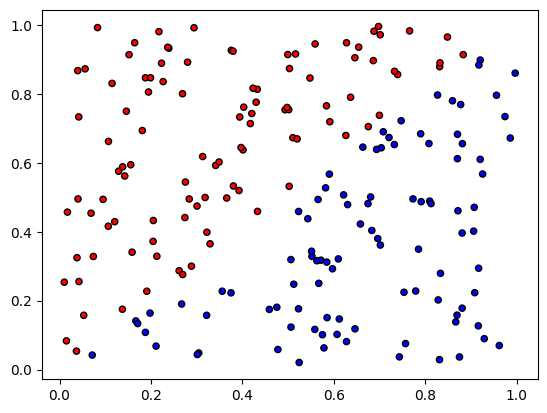

In [4]:
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)

<p> Write a python class called Question used to partition the dataset :</p>
<p> The training data could be seen as a table composed of 3 columns [X, Y] and 200 rows </p>

In [ ]:
class Question:
    """A Question is used to partition a dataset.
    """

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        # Since the data is continuous (2D), we use a comparison operator.
        val = example[self.column]
        return val >= self.value

<p> For each row in the dataset, check if it matches the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    </p>

In [7]:
def split(rows, question):
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows


<p> Calculate the gini Impurity or the Entropy </p>

In [ ]:
def class_counts(rows):
    """Counts the number of each type of example in a dataset.
    Returns:
        dict: A dictionary where keys are unique labels and values are their counts.
    """
    counts = {}
    # The label is the last element in the row.
    # In the setup (X and y), "row" is concatenated like [x1, x2, y]
    # The index for the label is therefore len(row) - 1.
    if len(rows) > 0:
        # Determine the label index assuming uniform structure
        label_index = len(rows[0]) - 1

        for row in rows:
            label = row[label_index]
            if label not in counts:
                counts[label] = 0
            counts[label] += 1
    return counts

In [ ]:
def gini(rows):
    #Class_counts counts the number of each type of example in a dataset.
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

<p> Compute the information gain as The uncertainty of the starting node, minus the weighted impurity of
    two child nodes.</p>

In [ ]:
def infomation_gain(left, right, current_uncertainty):
    p = float(len(left)) / (len(left) + len(right)) 
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

<p> Find the best question to ask by iterating over every feature / value
    and calculating the information gain </p>

In [18]:
def optimal_split(rows):
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = split(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = infomation_gain(true_rows, false_rows, current_uncertainty)

            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question


In [ ]:
def decisionTree(rows):
    """Recursively builds the decision tree."""

    # Find the best split for the dataset
    gain, question = optimal_split(rows)

    # Stopping condition: If no further information gain, we've reached a leaf.
    if gain == 0:
        # Return the class distribution (Leaf Node)
        return class_counts(rows)

    # Split the data based on the optimal question
    true_rows, false_rows = split(rows, question)

    # Recursively build the true branch.
    true_branch = decisionTree(true_rows)

    # Recursively build the false branch.
    false_branch = decisionTree(false_rows)

    # Return a Decision Node (a tuple containing the question and its branches)
    return (question, true_branch, false_branch)

In [ ]:
def classify(row, node):
    """Classifies a single row using the built decision tree."""

    if isinstance(node, dict):
        return node

    # a Decision Node is a tuple: (question, true_branch, false_branch)
    question, true_branch, false_branch = node

    if question.match(row):
        return classify(row, true_branch)
    else:
        return classify(row, false_branch)

In [ ]:

def print_tree(node, spacing=""):

    if isinstance(node, dict):
        print(spacing + "Predict", node)
        return

    question, true_branch, false_branch = node
    print(spacing + str(question))

    print(spacing + '--> True:')
    print_tree(true_branch, spacing + "  ")

    print(spacing + '--> False:')
    print_tree(false_branch, spacing + "  ")


<H1>Train and print result

In [ ]:
# Combine X (features) and y (labels) into a single dataset array
# X has shape (200, 2), y has shape (200,). We reshape y to (200, 1) for hstack.
rows = np.hstack((X, y.reshape(-1, 1)))

my_tree = decisionTree(rows)

print("--- Trained Tree Structure ---")
print_tree(my_tree)

Building the Decision Tree...

--- Trained Tree Structure ---
Is feature 0 is >=  0.5060?
--> True:
  Is feature 1 is >=  0.6694?
  --> True:
    Is feature 0 is >=  0.7079?
    --> True:
      Is feature 1 is >=  0.8562?
      --> True:
        Is feature 0 is >=  0.9169?
        --> True:
          Predict {np.float64(0.0): 3}
        --> False:
          Predict {np.float64(1.0): 7}
      --> False:
        Predict {np.float64(0.0): 11}
    --> False:
      Predict {np.float64(1.0): 18}
  --> False:
    Predict {np.float64(0.0): 68}
--> False:
  Is feature 1 is >=  0.2536?
  --> True:
    Predict {np.float64(1.0): 73}
  --> False:
    Is feature 0 is >=  0.1669?
    --> True:
      Is feature 1 is >=  0.2273?
      --> True:
        Is feature 1 is >=  0.2274?
        --> True:
          Predict {np.float64(0.0): 1}
        --> False:
          Predict {np.float64(1.0): 1}
      --> False:
        Predict {np.float64(0.0): 13}
    --> False:
      Is feature 1 is >=  0.0536?
      -

<h1> using sklearn and matplotlib to visulise the decision boundary

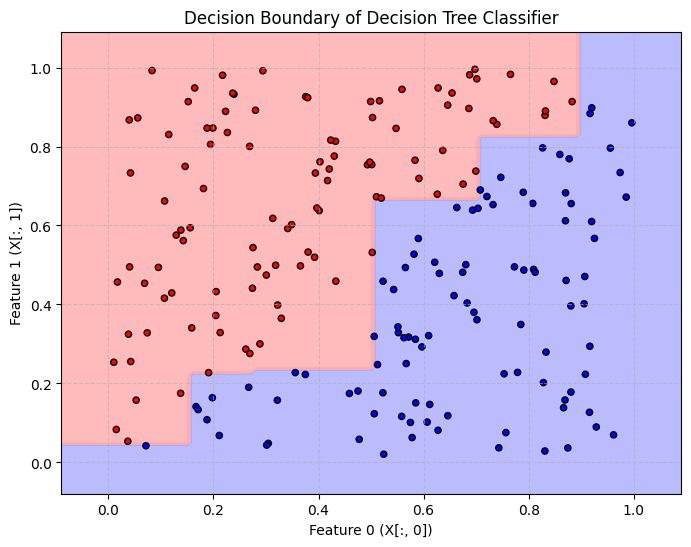

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

# --- 1. Prepare and Train the Model (Necessary for the boundary plot) ---

# X and y are assumed to be available from your previous cells.
# We reuse the color maps defined earlier (cmap_light and cmap_bold).
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF', '#FF0000'])

# Train the scikit-learn Decision Tree Classifier
# We use criterion='gini' and no max_depth to match your full training.
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X, y)

# --- 2. Create the Meshgrid and Prediction Array ---

# Determine plot boundaries (a little padding around the data)
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

# Create a mesh grid of points covering the entire plot area
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for every point in the mesh grid
# Ravel() flattens the grid, c_[] stacks the coordinates, and reshape() returns it to grid shape.
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# --- 3. Plot the Decision Boundary and Data Points ---

plt.figure(figsize=(8, 6))

# Plot the decision boundary (colored regions)
# The boundary is where the color changes from blue to red in the contour plot.
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot the original training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundary of Decision Tree Classifier")
plt.xlabel("Feature 0 (X[:, 0])")
plt.ylabel("Feature 1 (X[:, 1])")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<h1>using sklearn to generate a better graph of the the decision Tree, i put the image with the code

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# 1. Prepare data for scikit-learn
# X and y are assumed to be available from your previous cells.
# X is the features (200, 2), y is the labels (200,)

# 2. Train a scikit-learn Decision Tree Classifier
# We set max_depth to a small value (like 3) for a cleaner visualization,
# but using the default depth might better reflect your custom implementation.
# criterion='gini' matches the impurity metric you used.
print("Training scikit-learn Decision Tree (Criterion: Gini)...")
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X, y)

# 3. Export the tree structure to the DOT format
print("\n--- Decision Tree Structure (DOT format for graphviz) ---")
print("Copy this output and paste it into an online graphviz renderer (e.g., https://dreampuf.github.io/GraphvizOnline/) to see the visualization.")

# We use export_graphviz to generate the DOT string.
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=['Feature 0', 'Feature 1'], # Your two columns
    class_names=['Class 0.0', 'Class 1.0'],   # Your two labels
    filled=True,
    rounded=True,
    special_characters=True
)

print(dot_data)

Training scikit-learn Decision Tree (Criterion: Gini)...

--- Decision Tree Structure (DOT format for graphviz) ---
Copy this output and paste it into an online graphviz renderer (e.g., https://dreampuf.github.io/GraphvizOnline/) to see the visualization.
digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<Feature 0 &le; 0.504<br/>gini = 0.5<br/>samples = 200<br/>value = [97, 103]<br/>class = Class 1.0>, fillcolor="#f3f9fd"] ;
1 [label=<Feature 1 &le; 0.241<br/>gini = 0.271<br/>samples = 93<br/>value = [15, 78]<br/>class = Class 1.0>, fillcolor="#5fb0ea"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Feature 0 &le; 0.152<br/>gini = 0.375<br/>samples = 20<br/>value = [15, 5]<br/>class = Class 0.0>, fillcolor="#eeab7b"] ;
1 -> 2 ;
3 [label=<Feature 1 &le; 0.048<br/>gini = 0.32<br/>samples = 5<br/>value = [1, 4]<br/>class = Class 1.0>, fillcolor="#6ab6ec"] ;
2 -> 3 ;
4 [label=<g